### University of Virginia
### DS 5559: Big Data Analytics
### K-Means Cluster Analysis of Fidelity Fund Returns 
### Last updated: June 16, 2020

## Instructions

In this assignment, you will conduct a k-means cluster analysis on a set of Fidelity mutual funds.  The data consists of the daily returns (percentage change in price), with tickers as the identifiers.  The outline below will walk you through the required steps.  

This assignment is worth a total of 10 POINTS.

## Data Preprocessing

In [2]:
import pandas as pd
import numpy as np
from math import sqrt

In [3]:
# read in the dataset
df0 = pd.read_csv('fido_returns.csv')

In [4]:
df0.head(3)

,Index,FSCEX,FSCBX,FSCIX,FDGIX,FADBX,FADAX,FDGTX,FSFCX,FAMUX,...,FVDKX,FDVLX,FVLKX,FSLSX,FASBX,FVSKX,FWWFX,FBVFX,FCFFX,FTFFX
0,2007-01-03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
1,2007-01-04,0.000000,0.000000,0.000000,0.000826,0.000828,0.000840,0.001663,0.001165,0.001,...,0.0,0.000718,0.0,0.000377,0.000857,0.0,-0.004638,0.000726,0.000000,0.000000
2,2007-01-05,-0.010407,-0.010517,-0.010764,-0.004967,-0.004979,-0.005051,-0.005831,-0.001165,0.000,...,0.0,-0.008943,0.0,-0.011749,-0.012069,0.0,-0.009927,-0.008746,-0.006826,-0.006957


In [5]:
# store the tickers in a list called tickers
tickers = list(df0.columns[1:])
tickers[:5]

['FSCEX', 'FSCBX', 'FSCIX', 'FDGIX', 'FADBX']

In [6]:
# store the dates
dates = df0.Index.values
dates[:5]

array(['2007-01-03', '2007-01-04', '2007-01-05', '2007-01-08',
       '2007-01-09'], dtype=object)

In [7]:
# drop the index column
del df0['Index']

In [9]:
df0.head(3)

,FSCEX,FSCBX,FSCIX,FDGIX,FADBX,FADAX,FDGTX,FSFCX,FAMUX,FNBCX,...,FVDKX,FDVLX,FVLKX,FSLSX,FASBX,FVSKX,FWWFX,FBVFX,FCFFX,FTFFX
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000826,0.000828,0.000840,0.001663,0.001165,0.001,0.001101,...,0.0,0.000718,0.0,0.000377,0.000857,0.0,-0.004638,0.000726,0.000000,0.000000
2,-0.010407,-0.010517,-0.010764,-0.004967,-0.004979,-0.005051,-0.005831,-0.001165,0.000,-0.001101,...,0.0,-0.008943,0.0,-0.011749,-0.012069,0.0,-0.009927,-0.008746,-0.006826,-0.006957


In [11]:
# store the dataframe values
vals = df0.values

In [12]:
# transpose the data, putting funds on rows and timepoints on columns
vals_t = vals.transpose()

In [13]:
# VALUE: 1 POINT
# print the shape of the transposed dataframe
vals_t.shape

(927, 1731)

In [15]:
# build the dataframe w transposed data, calling it dft
dft = pd.DataFrame(data=vals_t, index=df0.columns, columns=dates)

In [16]:
dft.head(3)

,2007-01-03,2007-01-04,2007-01-05,2007-01-08,2007-01-09,2007-01-10,2007-01-11,2007-01-12,2007-01-16,2007-01-17,...,2013-10-28,2013-10-29,2013-10-30,2013-10-31,2013-11-01,2013-11-04,2013-11-05,2013-11-06,2013-11-07,2013-11-08
FSCEX,0.0,0.0,-0.010407,0.003686,-0.001841,-0.000614,0.008568,0.004863,0.000000,-0.003645,...,-0.000386,0.003470,-0.006178,-0.001163,-0.003885,0.010070,-0.005797,-0.001940,-0.013685,0.013297
FSCBX,0.0,0.0,-0.010517,0.003724,-0.001240,-0.001241,0.008658,0.004914,-0.000613,-0.003070,...,-0.000391,0.003512,-0.006252,-0.001177,-0.003932,0.009802,-0.005870,-0.001571,-0.013853,0.013460
FSCIX,0.0,0.0,-0.010764,0.003781,-0.001619,0.000000,0.008602,0.004274,0.000000,-0.003203,...,-0.000633,0.003789,-0.006323,-0.000952,-0.003817,0.009830,-0.005696,-0.001588,-0.013762,0.013445


In [15]:
# save preprocessed data to file
dft.to_csv('fido_returns_funds_on_rows.csv', index=False)

### Load Modules

In [17]:
from pyspark import SparkContext
from pyspark.mllib.clustering import KMeans, KMeansModel

sc = SparkContext.getOrCreate()

### Read in Preprocessed Data

In [2]:
# Read as RDD. Dates along columns, funds along rows
fido = sc.textFile("fido_returns_funds_on_rows.csv")

In [3]:
#fido.take(2)

In [4]:
# save the header row
header = fido.first()

In [5]:
# build RDD without header
fido_data = fido.filter(lambda row: row != header)

In [20]:
#fido_data.take(1)

In [9]:
# VALUE: 1 POINT
# extract data by parsing out commas. cast to array of floats. hint: a list comprehension may be helpful.
fido_parsed = fido_data.map(lambda line: np.array([float(x) for x in line.split(',')]))

In [10]:
fido_parsed.take(1)

[array([ 0.        ,  0.        , -0.0104072 , ..., -0.00193986,
        -0.01368545,  0.01329703])]

### Build the K-Means Model

In [11]:
# parameters: use 3 clusters, and a maximum of 10 iterations
num_clusters = 3  # k
max_iter = 10

In [16]:
# VALUE: 1 POINT
# train k-means
clusters = KMeans.train(fido_parsed, num_clusters, maxIterations=max_iter, initializationMode="random")

In [17]:
clusters

In [18]:
clusters.centers

[array([ 0.        ,  0.00030585, -0.00074434, ...,  0.00128846,
        -0.00486191,  0.00077248]),
 array([ 0.        , -0.00076798, -0.00626858, ...,  0.00184544,
        -0.01327054,  0.00936274]),
 array([ 0.        , -0.00109437, -0.01218246, ...,  0.00229498,
        -0.01295338,  0.00637824])]

In [19]:
clusters.k

3

In [20]:
# VALUE: 2 POINTS
# Write a function called error() which takes a point as input and returns Within Set Sum of Squared Errors (WSSE)

def error(point):
    center = clusters.centers[clusters.predict(point)]
    return sum([x**2 for x in (point - center)])

In [21]:
WSSSE = fido_parsed.map(lambda point: error(point)).reduce(lambda x, y: x + y)
print("Within Set Sum of Squared Error = " + str(WSSSE))

Within Set Sum of Squared Error = 55.027494056028374


In [22]:
# VALUE: 1 POINT
# k=3
#Within Set Sum of Squared Error = 50.68126698527291

In [29]:
# VALUE: 2 POINTS
# Write code to fit k-means with k ranging from 2 through 10, inclusive.  Then print WSSE for each value of k.

num_clusters_list = range(2,11)
# set up storage
kmeans_out = pd.DataFrame(columns=['wsse'], index=num_clusters_list)

for k in num_clusters_list:
    clusters = KMeans.train(fido_parsed, k, maxIterations=max_iter, initializationMode="random")
    WSSSE = fido_parsed.map(lambda point: error(point)).reduce(lambda x, y: x + y)
    kmeans_out.wsse.loc[k] = WSSSE

In [30]:
kmeans_out

,wsse
2,59.5664
3,51.5867
4,44.8726
5,47.4891
6,38.3483
7,37.2469
8,37.6999
9,34.6288
10,30.5329


In [31]:
%matplotlib inline
import matplotlib.pyplot as plt

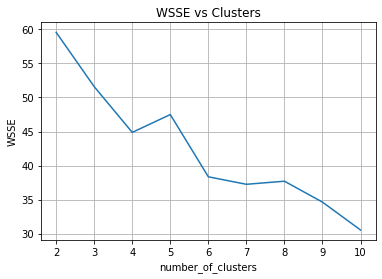

In [32]:
# VALUE: 1 POINT

# plot k on the x-axis, and WSSE on the y-axis
plt.plot(kmeans_out.index, kmeans_out.wsse)
plt.xlabel('number_of_clusters')
plt.ylabel('WSSE')
plt.title('WSSE vs Clusters')
plt.grid(True)
plt.savefig("fido_kmeans.png")
plt.show()

### Look at predicted cluster membership

In [33]:
# VALUE: 1 POINT
# For the case k=10: 
# predict the cluster each fund belongs to
# print the number of funds assigned to each cluster (need to code for this)

ten_clusters = KMeans.train(fido_parsed, k, maxIterations=max_iter, initializationMode="random")
preds = ten_clusters.predict(fido_parsed).collect()

In [34]:
from collections import Counter
pred_count_by_cluster = Counter(preds)
pred_count_by_cluster

Counter({4: 208,
         1: 81,
         8: 206,
         7: 148,
         6: 109,
         9: 60,
         2: 32,
         3: 7,
         5: 30,
         0: 46})